# PS-iMAP Usability Test Results

## Quantitative Data Analysis of Task Accuracy and Task Completion Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, t, sem

In [2]:
colors = ['#FFD700', '#9B40D6']
color_profiles = ['#1ABEF9', '#FA8C16']

In [3]:
def plot_points_ci(data, x, hue):
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(data=data, x=x, errorbar='ci', hue=hue, capsize=.3, ax=axs[0])
    sns.stripplot(data=data, x=x, hue=hue, jitter=.3, dodge=True, ax=axs[1])
    return f, axs

In [4]:
psimap_df = pd.read_csv("ps_imap_details.csv")
psimap_df

,Participant,Task,Time (seconds),Correct,Training,Genre,Profile,Experience Time (years)
0,P1,T01,50,Yes,Yes,M,Computer Scientist,10.0
1,P1,T02,38,Yes,Yes,M,Computer Scientist,10.0
2,P1,T03,12,Yes,Yes,M,Computer Scientist,10.0
3,P1,T04,0,Yes,Yes,M,Computer Scientist,10.0
4,P1,T05,10,Yes,Yes,M,Computer Scientist,10.0
...,...,...,...,...,...,...,...,...
72,P7,T07,63,No,No,F,Pathologist,5.5
73,P7,T08,37,Yes,No,F,Pathologist,5.5
74,P7,T09,35,Yes,No,F,Pathologist,5.5
75,P7,T10,7,Yes,No,F,Pathologist,5.5


## Data Preparation

In [5]:
time_correct_answers = psimap_df[psimap_df["Correct"] == 'Yes'].groupby("Participant")["Time (seconds)"].sum()
time_correct_answers = time_correct_answers.reset_index()
time_correct_answers

,Participant,Time (seconds)
0,P1,292
1,P2,145
2,P3,222
3,P4,219
4,P5,147
5,P6,368
6,P7,268


In [6]:
# Preparing the data for plots
correct_answers = psimap_df.groupby(['Participant', 'Training', 'Profile'])['Correct'].value_counts().reset_index()
correct_answers = correct_answers[correct_answers['Correct'] == 'Yes']
# seletc only Participant and count Columns
correct_answers = correct_answers[['Participant', 'Training', 'Profile', 'count']]
correct_answers.columns = ['Participant','Training', 'Profile', 'Correct Answers']
correct_answers.reset_index(inplace=True, drop=True)
correct_answers['Percentage Correct'] = round(correct_answers['Correct Answers'] / 11 * 100, 0)
correct_answers

,Participant,Training,Profile,Correct Answers,Percentage Correct
0,P1,Yes,Computer Scientist,10,91.0
1,P2,Yes,Computer Scientist,10,91.0
2,P3,No,Computer Scientist,9,82.0
3,P4,Yes,Pathologist,10,91.0
4,P5,Yes,Pathologist,10,91.0
5,P6,No,Pathologist,9,82.0
6,P7,No,Pathologist,7,64.0


In [7]:
full_df = pd.merge(correct_answers, time_correct_answers, on='Participant')
full_df

,Participant,Training,Profile,Correct Answers,Percentage Correct,Time (seconds)
0,P1,Yes,Computer Scientist,10,91.0,292
1,P2,Yes,Computer Scientist,10,91.0,145
2,P3,No,Computer Scientist,9,82.0,222
3,P4,Yes,Pathologist,10,91.0,219
4,P5,Yes,Pathologist,10,91.0,147
5,P6,No,Pathologist,9,82.0,368
6,P7,No,Pathologist,7,64.0,268


Splitting groups by conditions: training and no-training, and participant profile

In [8]:
# splitting groups by training condition
full_df_training = full_df[full_df['Training'] == 'Yes']
full_df_no_training = full_df[full_df['Training'] == 'No']
#splitting groups by profile
full_df_cs = full_df[full_df['Profile'] == 'Computer Scientist']
full_df_patho = full_df[full_df['Profile'] == 'Pathologist']

### Significance Tests

Mann-Whitney U tests were performed to compare task accuracy and task time completion in different groups.

There **was a significant** difference in **task accuracy** between training group and no-training group; z = 12.0, p = 0.03.

In [9]:
percent_training = full_df_training['Percentage Correct']
percent_no_training = full_df_no_training['Percentage Correct']
(statistic, pvalue) = mannwhitneyu(percent_training, percent_no_training, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", pvalue)

Mann-Whitney U test statistic: 12.0
p-value: 0.030065283228311607


There was not a significant difference in task accuracy between computer scientists and pathologists; z = 7.5, p = 0.69.

In [10]:
percent_cs = full_df_cs['Percentage Correct']
percent_patho = full_df_patho['Percentage Correct']
(statistic, pvalue) = mannwhitneyu(percent_cs, percent_patho, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", pvalue)

Mann-Whitney U test statistic: 7.5
p-value: 0.693281817504481


There was not a significant difference in task accuracy between training group and no-training group; z = 2.0, p = 0.23.

In [11]:
time_training = full_df_training['Time (seconds)']
time_no_training = full_df_no_training['Time (seconds)']
(statistic, pvalue) = mannwhitneyu(time_training, time_no_training, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", pvalue)

Mann-Whitney U test statistic: 2.0
p-value: 0.22857142857142856


There was not a significant difference in task time completion between computer scientists and pathologists; z = 5.0, p = 0.86.

In [12]:
time_cs = full_df_cs['Time (seconds)']
time_patho = full_df_patho['Time (seconds)']
(statistic, pvalue) = mannwhitneyu(time_cs, time_patho, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", pvalue)


Mann-Whitney U test statistic: 5.0
p-value: 0.8571428571428571


## Plots

In [13]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [31]:
correct = full_df['Correct Answers']
correct_training = full_df_training['Correct Answers']
correct_no_training = full_df_no_training['Correct Answers']
ci_correct = t.interval(0.95, len(correct)-1, loc=np.mean(correct), scale=sem(correct))
# ci_correct_training = t.interval(0.95, len(correct_training)-1, loc=np.mean(correct_training), scale=sem(correct_training))
ci_correct_no_training = t.interval(0.95, len(correct_no_training)-1, loc=np.mean(correct_no_training), scale=sem(correct_no_training))
print("All participants mean correct answers:", np.mean(correct))
print("All participants 95% CI:", ci_correct)
print("Training group mean correct answers:", np.mean(correct_training))
# print("Training group 95% CI:", ci_correct_training)
print("No training group mean correct answers:", np.mean(correct_no_training))
print("No training group 95% CI:", ci_correct_no_training)


All participants mean correct answers: 9.285714285714286
All participants 95% CI: (8.256640936652573, 10.314787634776)
Training group mean correct answers: 10.0
No training group mean correct answers: 8.333333333333334
No training group 95% CI: (5.464898180202573, 11.201768486464095)


### Task Accuracy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


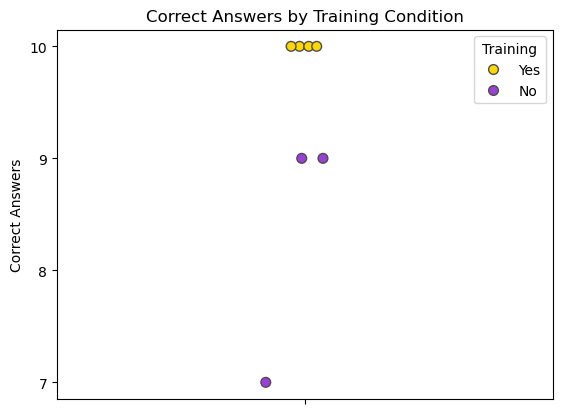

In [16]:
plot_correct = sns.stripplot(data=full_df, y="Correct Answers", 
              hue="Training", jitter=True, 
              palette=sns.color_palette(colors),
              s = 7, linewidth=1)
plot_correct.set_title("Correct Answers by Training Condition")
plot_correct.set_yticks([7, 8, 9, 10])
plot_correct.set_yticklabels(["7", "8", "9", "10"])
fig = plot_correct.get_figure()
fig.savefig("Figure5.eps")
fig.savefig("Figure5.jpg", dpi=300)

Text(0.5, 1.0, '95% CI of Correct Answers by Training Condition')

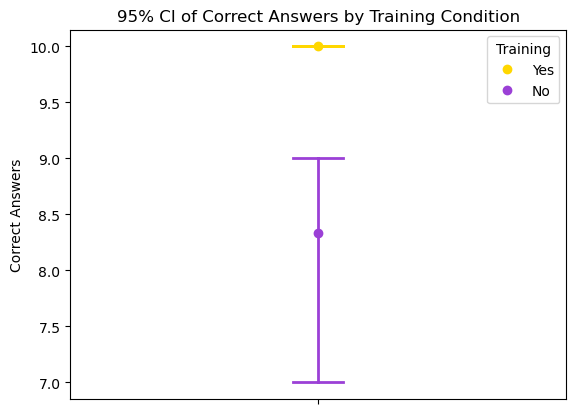

In [17]:
plot_correct_ci = sns.pointplot(data=full_df, y="Correct Answers", 
                  hue="Training", palette=sns.color_palette(colors), 
                  linestyle="none", errorbar="ci", capsize=.1, 
                  markersize=5, err_kws={'linewidth':2 })
plot_correct_ci.set_title("95% CI of Correct Answers by Training Condition")


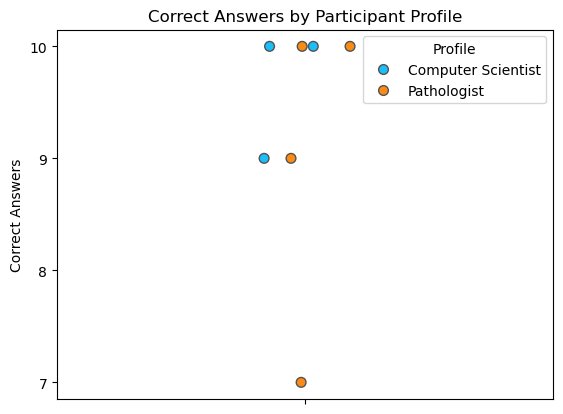

In [32]:
plot_correct = sns.stripplot(data=full_df, y="Correct Answers", 
              hue="Profile", jitter=True, 
              palette=sns.color_palette(color_profiles),
              s = 7, linewidth=1)
plot_correct.set_title("Correct Answers by Participant Profile")
plot_correct.set_yticks([7, 8, 9, 10])
plot_correct.set_yticklabels(["7", "8", "9", "10"])
fig = plot_correct.get_figure()

Text(0.5, 1.0, '95% CI of Correct Answers by Participant Profile')

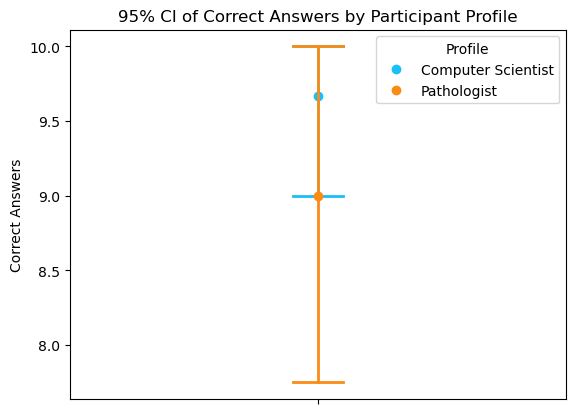

In [33]:
plot_correct_ci = sns.pointplot(data=full_df, y="Correct Answers", 
                  hue="Profile", palette=sns.color_palette(color_profiles), 
                  linestyle="none", errorbar="ci", capsize=.1, 
                  markersize=5, err_kws={'linewidth':2 })
plot_correct_ci.set_title("95% CI of Correct Answers by Participant Profile")

### Task Completion Time

Analysis of time to complete successful tasks.

Grouping by Training Condition

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


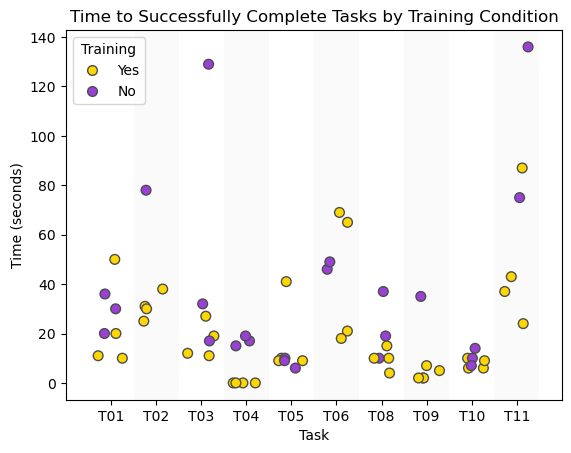

In [23]:
time_plot = sns.stripplot(data=psimap_df[psimap_df["Correct"] == "Yes"], x="Task", y="Time (seconds)",
                        hue="Training", jitter=0.3, 
                        palette=sns.color_palette(colors),
                        s=7, linewidth=1)
for x in range(0, len(psimap_df[psimap_df["Correct"] == "Yes"]['Task'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='#d5d5d5', alpha=[0.0 if x%2 == 0 else 0.1][0])
time_plot.set_title("Time to Successfully Complete Tasks by Training Condition")
fig = time_plot.get_figure()
fig.savefig("Figure6.eps")
fig.savefig("Figure6.jpg", dpi=300)


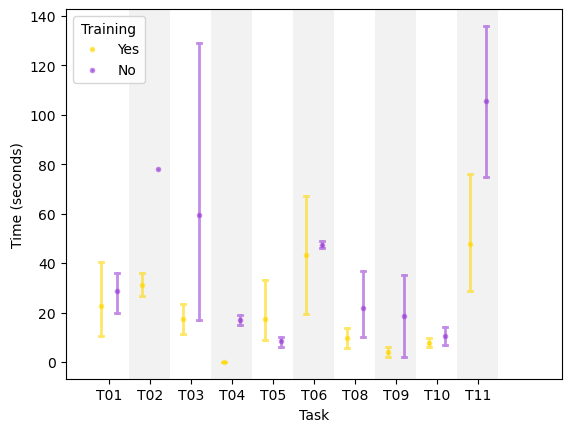

In [27]:
sns.pointplot(data=psimap_df[psimap_df["Correct"] == "Yes"], x="Task", y="Time (seconds)", 
              hue="Training", dodge=.4, linestyle="none", errorbar="ci", capsize=.1, 
              alpha=0.6, markersize=2, 
              palette=sns.color_palette(colors),
              err_kws={'linewidth':2 })
for x in range(0, len(psimap_df['Task'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='grey', alpha=[0.0 if x%2 == 0 else 0.1][0])

Grouping by Participant Profile

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


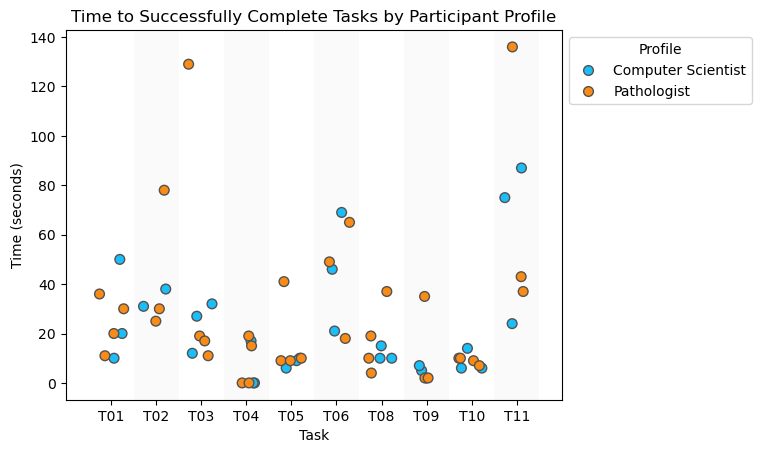

In [24]:
time_profile_plot = sns.stripplot(data=psimap_df[psimap_df["Correct"] == "Yes"], x="Task", y="Time (seconds)",
                        hue="Profile", jitter=0.3, 
                        palette=sns.color_palette(color_profiles),
                        s=7, linewidth=1)
for x in range(0, len(psimap_df[psimap_df["Correct"] == "Yes"]['Task'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='#d5d5d5', alpha=[0.0 if x%2 == 0 else 0.1][0])
time_profile_plot.set_title("Time to Successfully Complete Tasks by Participant Profile")
lgd = time_profile_plot.legend(title="Profile", loc='upper left', bbox_to_anchor=(1, 1))
#sns.move_legend(time_profile_plot, "upper left", bbox_to_anchor=(1, 1))
fig = time_profile_plot.get_figure()
fig.savefig("Figure7.pdf", bbox_inches='tight', format='pdf')
fig.savefig("Figure7.eps", bbox_inches='tight', bbox_extra_artists=(lgd,), format='eps')
fig.savefig("Figure7.jpg", dpi=300, bbox_inches='tight')


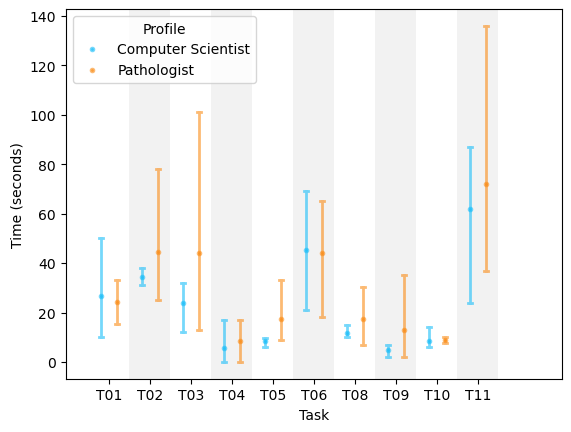

In [28]:
sns.pointplot(data=psimap_df[psimap_df["Correct"] == "Yes"], x="Task", y="Time (seconds)", 
              hue="Profile", dodge=.4, linestyle="none", errorbar="ci", capsize=.1, 
              alpha=0.6, markersize=2, 
              palette=sns.color_palette(color_profiles),
              err_kws={'linewidth':2 })
for x in range(0, len(psimap_df['Task'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='grey', alpha=[0.0 if x%2 == 0 else 0.1][0])